In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [7]:
# Define the parameters (langlen sss)
V0 = 2
V1 = 2
V4 = 5
kf = 1
k = 10
VM2 = 6
k2 = 0.1
VM3 = 20
m = 2
kx = 0.5
ky = 0.2
kz = 0.2
VM5 = 30
k5 = 3
kd = 0.5
p = 2
n = 4
V = 100000

In [8]:
# Define parameters
dt = 1e-4
tmax = 100
Nn = round(tmax / dt)

# Time array
tT = np.arange(0, tmax + dt, dt)

@njit
def solve_system(beta, epsilon):
    # Random variates
    xi = [np.random.normal(0, np.sqrt(dt), Nn) for _ in range(12)]
    # Initial conditions
    x = np.ones(Nn + 1)
    y = np.ones(Nn + 1)
    z = np.ones(Nn + 1)
    # Euler discretization
    for i in range(Nn):
        V2 = VM2 * x[i]**2 / (k2**2 + x[i]**2)
        V3 = VM3 * x[i]**m / (kx**m + x[i]**m) * y[i]**2 / (ky**2 + y[i]**2) * z[i]**4 / (kz**4 + z[i]**4)
        V5 = VM5 * z[i]**p / (k5**p + z[i]**p) * x[i]**n / (kd**n + x[i]**n)
        x[i + 1] = (x[i] + (V0 + V1 * beta - k * x[i] - V2 + kf * y[i] + V3) * dt + 1 / np.sqrt(V) * (np.sqrt(V0) * xi[0][i] + np.sqrt(V1 * beta) * xi[1][i] - np.sqrt(V2) * xi[2][i] + np.sqrt(V3) * xi[3][i] + np.sqrt(kf * y[i]) * xi[4][i] - np.sqrt(k) * xi[5][i]))
        y[i + 1] = (y[i] + (V2 - kf * y[i] - V3) * dt + 1 / np.sqrt(V) * (np.sqrt(V2) * xi[6][i] - np.sqrt(V3) * xi[7][i] - np.sqrt(kf * y[i]) * xi[8][i]))
        z[i + 1] = (z[i] + (V4 * beta - epsilon * z[i] - V5) * dt + 1 / np.sqrt(V) * (np.sqrt(V4 * beta) * xi[9][i] - np.sqrt(V5) * xi[10][i] - np.sqrt(epsilon * z[i]) * xi[11][i]))
    return x,y,z

In [9]:
x_t, y_t, z_t = solve_system(0.01, 0.1)

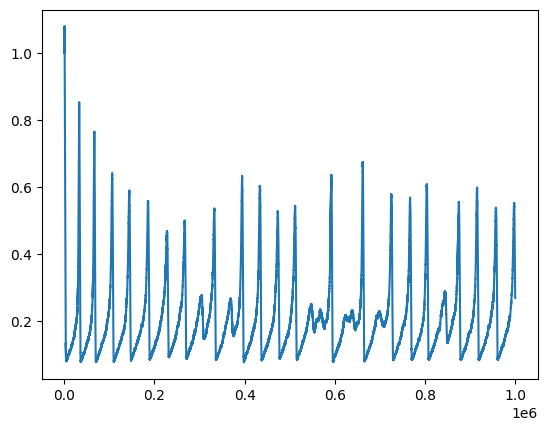

In [10]:
plt.plot(x_t)